***
# <font color="#8333ff"> PROJET 9 :  Etude de marché internationale </font>
****

### Tables des matières<a class="anchor" id="retour"></a> 

* [Présentation générale du projet](#Présentation)


### CLUSTERING

* [CHAP 1: CLUSTERING](#CHAP1)


* [Partie 1.1 :  Préparation des données](#Partie11)
  * [Section 1.11 Téléchargement des tables et mergin](#Section11.1)      
  * [Section 1.12 Critères d'exclusions](#Section11.2)     
  * [Section 1.13 Scatter Plot](#Section11.3)     
* [Partie 1.2 : Classification des données des pays de l'UE](#Partie12)
  * [Section 1.21 Classification Assendante Hiérarchique](#Section12.1)
  * [Section 1.22 Méthodes des K-means](#Section12.2)
* [Partie 1.3 : Classification des données des pays hors de l'UE](#Partie13)
  * [Section 1.31 Classification Assendante Hiérarchique](#Section13.1)
  * [Section 1.32 Méthodes des K-means](#Section13.2)
  
  
### ANALYSE EN COMPOSANTES PRINCIPALES (ACP)


* [Présentation des méthodes utilisées](#Présentation2)


* [CHAP 2: ACP sur les pays de l'Union Européenne](#CHAP2)


* [Partie 2.1 :  Préparation des données](#Partie21)
    * [Section 2.11 Importation des données](#Section21.1)
    * [Section 2.12 Centrage & Réduction](#Section21.2)

* [Partie 2 : Lancemant de l'ACP (scikit-learn)](#Partie22)
    * [Section 2.21 Instanciation et lancement des calculs](#Section22.1)
    * [Section 2.22 Valeurs propres et scree plot](#Section22.2)
    * [Section 2.23 Détermination du nombre de fateur à retenir](#Section22.3)
    * [Section 2.24 Représentation des individus](#Section22.4)
    * [Section 2.25 Représentation des variables](#Section22.5)    

    
    
* [CHAP 3 : ACP sur les pays Extra-Européens](#CHAP3)


* [Partie 3.1 :  Préparation des données](#Partie31)
    * [Section 3.11 Importation des données](#Section31.1)
    * [Section 3.12 Centrage & Réduction](#Section31.2)
    
* [Partie 3.2 : Lancemant de l'ACP (scikit-learn)](#Partie32)
    * [Section 3.21 Instanciation et lancement des calculs](#section32.1)
    * [Section 3.22 Valeurs propres et scree plot](#section32.2)
    * [Section 3.23 Détermination du nombre de fateur à retenir](#Section32.3)
    * [Section 3.24 Représentation des individus](#Section32.4)
    * [Section 3.25 Représentation des variables](#Section32.5) 


* [CHAP 4 : Traitement des individus et variables supplémentaires](#CHAP4)
    
     * [Section 4.10 Individus supplémentaires](#Section41)
     * [Section 4.20 Variables supplémentaires](#Section42)
     * [Section 4.30 Variable qualitative](#Section43)



### HEATMAP

* [CHAP 5 : HEATMAPS sur les CLUSTERS](#CHAP5)

   * [Section 5.10 : HEATMAP des pays de l'UE](#Section51)
   * [Section 5.20 : HEATMAP des pays Extra-Européens](#Section51)



### CONCLUSION & RECOMMANDATIONS

* [Conclusion et Recommandations](#conclusion)

****
****

## Présentation générale du projet  <a class="anchor" id="Présentation"></a> 

> Cette étude doit permettre à notre société de facilité la prise de décision quant à savoir le ou les pays dans lesquels nous allons importer notre poulet.   
>

> Le corp de ce notebook sera constitué de Trois grandes parties:      
-- les méthodes de Clustering doivent mettre en évidence les groupes de pays ayant un comportement similaire, au sens des variables sélectionnées.     
-- L'ACP doit permettre de mieux comprendre et représenter les groupes, à l'aide des composantes principales.    
-- les HEATMAPS donnent un appercu général des données et les différents groupes ressortes.    
>

>Toutes ces méthodes, visuelles à l'exception des K-means, rendent compte des groupes existant. Ainsi il est facile d'utiliser cette étude statistique comme aide à la prise de décision.    

> Acronyme utilisé:     
FAO = Food Agriculture Organization     
UE = Union-Européenne   
ACP = Analyse en Composantes Principales  
CAH = Classification Ascendante Hiérarchique

> La partie ACP est librement inspiré du cours      
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf  

# <font color="#8333ff"> CHAP 1 : CLUSTERING  <a class="anchor" id="CHAP1"></a>

## Partie 1.1 : Préparation des données    <a class="anchor" id="Partie11"></a> 

> Il s'agit dans cette partie de rendre utilisable les tables de la FAO:    
supprimer les colonnes inutilisables et gérer les valeurs nulles.    
J'ai ajouté une colonne avec le `PIB/hab` pour chaque pays.


### Section 1.11  Téléchargement des tables et mergin <a class="anchor" id="Section11.1"></a>

In [1]:
# Téléchargement des librairies nécessaires à l'étude

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import distance

# librairie pour évaluation des partitions
from sklearn import metrics
from sklearn import cluster

from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Permet d'avoir uniquement 2 chiffres après la virgule pour les floatants
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Importation des deux tables

df_alim = pd.read_csv("df_p9.csv",sep=";")

In [3]:
df_alim

,Code zone,Zone,Code Élément,Élément,Produit,Unité,Valeur,pib
0,1,Arménie,674,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,5.44,9098
1,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,0.54,1889
2,3,Albanie,674,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,6.26,12472
3,4,Algérie,674,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,1.97,15150
4,7,Angola,674,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,3.60,6813
...,...,...,...,...,...,...,...,...
1959,199,Slovaquie,5142,Nourriture,Viande de Volailles,Milliers de tonnes,76.00,32895
1960,199,Slovaquie,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,13.90,32895
1961,199,Slovaquie,664,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,48.00,32895
1962,199,Slovaquie,674,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,4.74,32895


In [4]:
df_alim_pivot = df_alim[['Zone','Élément','Valeur','pib']]
df_alim_pivot

,Zone,Élément,Valeur,pib
0,Arménie,Disponibilité de protéines en quantité (g/pers...,5.44,9098
1,Afghanistan,Disponibilité de protéines en quantité (g/pers...,0.54,1889
2,Albanie,Disponibilité de protéines en quantité (g/pers...,6.26,12472
3,Algérie,Disponibilité de protéines en quantité (g/pers...,1.97,15150
4,Angola,Disponibilité de protéines en quantité (g/pers...,3.60,6813
...,...,...,...,...
1959,Slovaquie,Nourriture,76.00,32895
1960,Slovaquie,Disponibilité alimentaire en quantité (kg/pers...,13.90,32895
1961,Slovaquie,Disponibilité alimentaire (Kcal/personne/jour),48.00,32895
1962,Slovaquie,Disponibilité de protéines en quantité (g/pers...,4.74,32895


In [5]:
df_alim_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     1964 non-null   object 
 1   Élément  1964 non-null   object 
 2   Valeur   1964 non-null   float64
 3   pib      1964 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.5+ KB


In [6]:
# Transformation des tables - Croisement lignes / colonnes
# On remplace toutes les valeurs manquantes

df_alim_pivot = df_alim_pivot.pivot_table(index='Zone',columns='Élément',values='Valeur', fill_value = 0)
df_alim_pivot

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,5.00,1.53,0.33,0.54,57.00,0,29.00,55.00,2,28.00,0.00,0,0,0.00
Afrique du Sud,0,0,0,143.00,35.69,9.25,14.11,2118.00,63,514.00,2035.00,83,1667.00,0.00,0,0,0.00
Albanie,0,0,0,85.00,16.36,6.45,6.26,47.00,0,38.00,47.00,0,13.00,0.00,0,0,4.00
Algérie,0,0,0,22.00,6.38,1.50,1.97,277.00,0,2.00,264.00,13,275.00,0.00,0,0,0.00
Allemagne,0,0,0,71.00,19.47,4.16,7.96,1739.00,646,842.00,1609.00,0,1514.00,-38.00,0,167,-29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0,0,0,147.00,43.47,9.25,14.80,412.00,94,433.00,412.00,0,48.00,0.00,0,0,-26.00
Équateur,0,0,0,83.00,19.31,6.35,6.15,341.00,0,0.00,324.00,17,340.00,0.00,0,0,-1.00
États-Unis,0,0,89,219.00,55.68,14.83,19.93,18266.00,3692,123.00,18100.00,0,21914.00,0.00,0,77,80.00


In [7]:
df_pib = df_alim[['Zone','pib']].drop_duplicates(keep='first').set_index('Zone')
df_pib

,pib
Zone,
Arménie,9098
Afghanistan,1889
Albanie,12472
Algérie,15150
Angola,6813
...,...
Sao Tomé-et-Principe,3208
Sénégal,2678
Serbie,15164


In [8]:
df_alim_pivot=pd.merge(df_alim_pivot, df_pib,how ='left',left_index = True,right_index=True)
df_alim_pivot

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,pib
Zone,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,5.00,1.53,0.33,0.54,57.00,0,29.00,55.00,2,28.00,0.00,0,0,0.00,1889
Afrique du Sud,0,0,0,143.00,35.69,9.25,14.11,2118.00,63,514.00,2035.00,83,1667.00,0.00,0,0,0.00,13403
Albanie,0,0,0,85.00,16.36,6.45,6.26,47.00,0,38.00,47.00,0,13.00,0.00,0,0,4.00,12472
Algérie,0,0,0,22.00,6.38,1.50,1.97,277.00,0,2.00,264.00,13,275.00,0.00,0,0,0.00,15150
Allemagne,0,0,0,71.00,19.47,4.16,7.96,1739.00,646,842.00,1609.00,0,1514.00,-38.00,0,167,-29.00,50206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0,0,0,147.00,43.47,9.25,14.80,412.00,94,433.00,412.00,0,48.00,0.00,0,0,-26.00,68245
Équateur,0,0,0,83.00,19.31,6.35,6.15,341.00,0,0.00,324.00,17,340.00,0.00,0,0,-1.00,11234
États-Unis,0,0,89,219.00,55.68,14.83,19.93,18266.00,3692,123.00,18100.00,0,21914.00,0.00,0,77,80.00,59495


In [9]:
# On renome les colonnes pour plus de clareté

df_alim_pivot=df_alim_pivot.rename(columns={"Aliments pour animaux":'animaux',
                                            'Alimentation pour touristes':'touristes',
                                            'Disponibilité intérieure':'dispo_int',
                                            'Variation de stock':'Var_stock',
                                            "Autres utilisations (non alimentaire)":'autres',
                                            'Disponibilité alimentaire (Kcal/personne/jour)' : 'dispo_Kcal', 
                                            'Disponibilité de protéines en quantité (g/personne/jour)' : 'dispo_prot',
                                            'Disponibilité alimentaire en quantité (kg/personne/an)':'dispo_kg',
                                            'Exportations - Quantité':'Exportation',
                                            'Importations - Quantité':'Importation',
                                            'Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mat_gr'} ) 

In [10]:
df_alim_pivot

,touristes,animaux,autres,dispo_Kcal,dispo_kg,dispo_mat_gr,dispo_prot,dispo_int,Exportation,Importation,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Var_stock,pib
Zone,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,5.00,1.53,0.33,0.54,57.00,0,29.00,55.00,2,28.00,0.00,0,0,0.00,1889
Afrique du Sud,0,0,0,143.00,35.69,9.25,14.11,2118.00,63,514.00,2035.00,83,1667.00,0.00,0,0,0.00,13403
Albanie,0,0,0,85.00,16.36,6.45,6.26,47.00,0,38.00,47.00,0,13.00,0.00,0,0,4.00,12472
Algérie,0,0,0,22.00,6.38,1.50,1.97,277.00,0,2.00,264.00,13,275.00,0.00,0,0,0.00,15150
Allemagne,0,0,0,71.00,19.47,4.16,7.96,1739.00,646,842.00,1609.00,0,1514.00,-38.00,0,167,-29.00,50206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0,0,0,147.00,43.47,9.25,14.80,412.00,94,433.00,412.00,0,48.00,0.00,0,0,-26.00,68245
Équateur,0,0,0,83.00,19.31,6.35,6.15,341.00,0,0.00,324.00,17,340.00,0.00,0,0,-1.00,11234
États-Unis,0,0,89,219.00,55.68,14.83,19.93,18266.00,3692,123.00,18100.00,0,21914.00,0.00,0,77,80.00,59495


***
> Après de multiples transformations, nous avons construit une table où chaque ligne (les individus) représente un pays et chaque colonne représente une variable.    
la table d'origine provient de la FAO, donc toutes les valeurs manquantes sont remplacées par 0. 
***

### Section 1.2 Scatter Plot <a class="anchor" id="Section11.3"></a>

C:\Users\fbbou\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\fbbou\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\fbbou\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


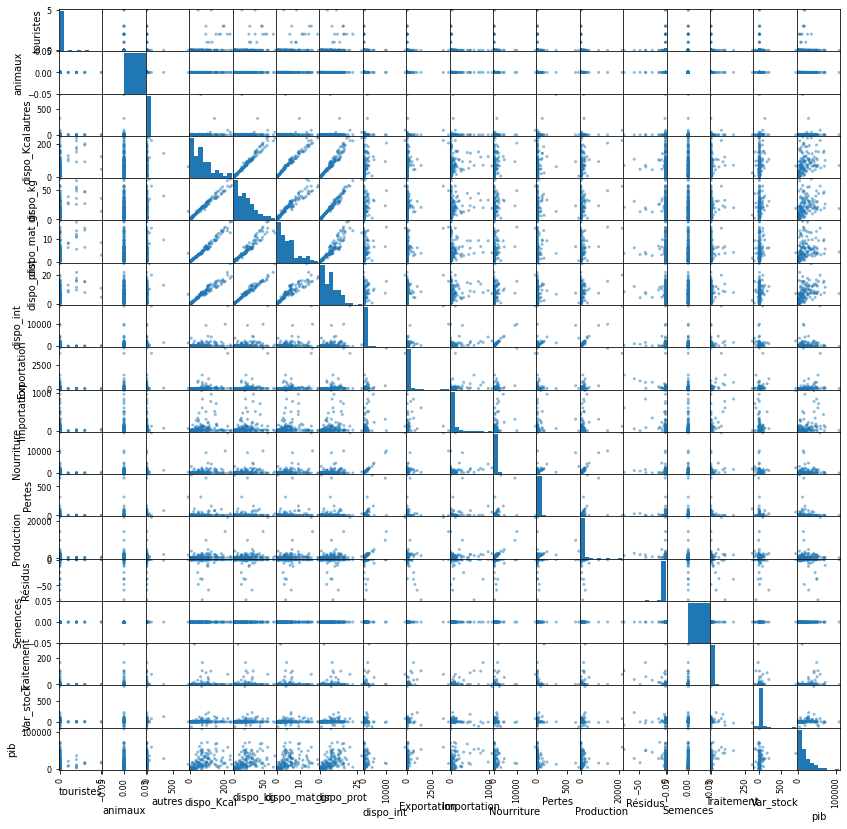

In [11]:
pd.plotting.scatter_matrix(df_alim_pivot,figsize=(14,14))
plt.show()

***
#### Interprétation du ScatterPlot
> Ce graphique met en évidence deux caractéristiques de la table:    
**Premièrement**, les colonnes touristes, semmences et animaux sont à 0 quelque soit les valeurs des autres variables, ce qui est logique, on ne nourrit pas les animaux avec du poulet et on n'utilise pas le poulet comme semmence. Ces 2 variables peuvent être exclues de la table.    
**Deuxiemment**, les trois variables {calories/hab,graisse/hab et proteine/hab} sont linéairement parfaitement dépendante. Ce qui est attendu. Ce n'est donc pas utilie de conserver ces tois variables, une seule est suffisante: **'Disponibilité alimentaire en quantité (kg/personne/an)'** ou **'dispo_kg'** dans la dernière version de la table.   
**Troisièment** les variables Résidus, Pertes et Autres ne sont pas essentielles pour la construction d'un modèle, et elles sont plus des variables comptables pour équilibrer les comptes, que de véritable données utilisable. Elles  seront des variables supplémentaires dans l'ACP.
***

In [12]:
# On exclut de l'analyse les 6 variables

df_alim_pivot = df_alim_pivot.drop(columns=['touristes','animaux', 'Semences','dispo_mat_gr',
                                            'dispo_prot','dispo_Kcal','Traitement'])

### Section 1.3  Critères d'exclusions <a class="anchor" id="Section11.2"></a>

***
#### Nous exclurons des pays selon quatre critères       

>**Premièrement**, les pays qui ont un PIB/hab en dessous de `15 000€` par an. Nous envisageons difficelement une population trop pauvre acheter du poulet Français.      
**Deuxièment**, les pays qui consomment essentielement de la viandes avec un `rituel d'abatage religieux`, certains pays mulusulmans et Israel.     
**Troisièment**, les pays qui n'importent pas de poulet, modifier les habitudes des consommatuers coûte extrêment cher.    
**Quatrièment**, la France ne doit pas parasiter l'étude, elle sera toute fois conservée comme individu suppémentaire pour l'ACP afin de voir où elle se situe par rapport aux autres pays de l'UE.     
***

In [13]:
# Critères d'exclusions, PIB/hab/an > 15 000 euros
df_alim_pivot=df_alim_pivot[df_alim_pivot["pib"]>15000]

# Critères d'exclusions, Importation superieur à 20 tonnes de poulet par an
df_alim_pivot=df_alim_pivot[df_alim_pivot['Importation']>20]

# Suppression des pays consommant exlusivement du poulet avec un rituel d'abattage religieux (mulusman)
df_alim_pivot=df_alim_pivot.drop(['Émirats arabes unis','Malaisie'])

df_alim_pivot

,autres,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Pertes,Production,Résidus,Var_stock,pib
Zone,,,,,,,,,,,
Allemagne,0,19.47,1739.00,646,842.00,1609.00,0,1514.00,-38.00,-29.00,50206
Arabie saoudite,0,43.36,1435.00,10,722.00,1435.00,0,616.00,0.00,-108.00,55263
Autriche,0,18.20,173.00,78,110.00,160.00,0,148.00,0.00,8.00,49247
Azerbaïdjan,0,13.11,129.00,0,27.00,129.00,0,104.00,0.00,2.00,17433
Bahamas,9,43.17,26.00,0,24.00,16.00,0,6.00,0.00,4.00,25080
Belgique,0,12.65,152.00,656,338.00,144.00,0,463.00,-25.00,-6.00,46301
Biélorussie,0,27.98,265.00,152,21.00,264.00,0,463.00,0.00,67.00,18616
Bulgarie,0,22.06,157.00,45,108.00,157.00,0,107.00,0.00,13.00,21578
Canada,0,39.02,1433.00,163,182.00,1433.00,0,1417.00,0.00,3.00,48141


In [14]:
# Variables supplémentaires
var_sup_p9 = df_alim_pivot[['Pertes','Résidus','autres','Var_stock']]


# On supprime les variables supplémentaires, elles seront réintroduites au moment de l'ACP
df_alim_pivot=df_alim_pivot.drop(columns=['Pertes','Résidus','autres','Var_stock'])

***
### Scission des données : UE / Hors UE

> Cette étude prend encompte les critéres de l'analyse `PESTEL`      
{ Politique Economique Sociale Technologique Environnemental }
>

>Dans ce cadre, il est decidé de faire l'analyse en doublée    
Les pays seront séparés en deux groupes:     
-- Les pays faisant partie de l'UE     
-- Les pays ne faisant pas partie de l'UE
>
***

In [15]:
liste_pays=('Allemagne','Autriche','Belgique','Bulgarie','Croatie','Danemark','Espagne','Estonie','Irlande','Italie','Grèce',
            'Hongrie','Lettonie','Lituanie','Pays-Bas','Pologne','Portugal','Royaume-Uni','Roumanie','Suède',
            'Slovaquie','Tchéquie')

In [16]:
df_ue=df_alim_pivot.loc[['Allemagne','Autriche','Belgique','Bulgarie','Croatie','Danemark','Espagne','Estonie','Irlande','Italie','Grèce',
                         'Hongrie','Lettonie','Lituanie','Pays-Bas','Pologne','Portugal','Royaume-Uni','Roumanie','Suède',
                         'Slovaquie','Tchéquie']]
                              
df_ue

,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Production,pib
Zone,,,,,,,
Allemagne,19.47,1739.00,646,842.00,1609.00,1514.00,50206
Autriche,18.20,173.00,78,110.00,160.00,148.00,49247
Belgique,12.65,152.00,656,338.00,144.00,463.00,46301
Bulgarie,22.06,157.00,45,108.00,157.00,107.00,21578
Croatie,10.77,45.00,17,24.00,45.00,61.00,24095
Danemark,28.98,167.00,139,133.00,166.00,173.00,49613
Espagne,30.39,1497.00,212,205.00,1418.00,1515.00,38171
Estonie,21.26,29.00,11,21.00,28.00,20.00,31473
Irlande,25.82,128.00,93,99.00,123.00,110.00,72632


In [17]:
# Suppression des pays de l'UE
df_hors_ue=df_alim_pivot.drop(['Allemagne','Autriche','Belgique','Bulgarie','Croatie','Danemark','Espagne','Estonie','Irlande',
                               'Italie','Grèce','Hongrie','Lettonie','Lituanie','Pays-Bas','Pologne','Portugal',
                               'Slovaquie','Royaume-Uni','Roumanie','Suède','Tchéquie'])

df_hors_ue

,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Production,pib
Zone,,,,,,,
Arabie saoudite,43.36,1435.00,10,722.00,1435.00,616.00,55263
Azerbaïdjan,13.11,129.00,0,27.00,129.00,104.00,17433
Bahamas,43.17,26.00,0,24.00,16.00,6.00,25080
Biélorussie,27.98,265.00,152,21.00,264.00,463.00,18616
Canada,39.02,1433.00,163,182.00,1433.00,1417.00,48141
Chili,36.36,672.00,115,155.00,672.00,712.00,24588
Chine,22.75,9473.00,292,306.50,9151.50,9444.00,16624
Corée du Sud,9.16,448.50,3,68.50,447.50,440.50,39387
France,22.90,1573.00,501,506.00,1485.00,1750.00,43551


***
>**la Chine, les États-Unis, la France, la Russie et la Biélorussie** doivent être traitées à part pour ne pas fausser les résultat de l'étude.     
Les valeurs sont soit très grandes, soit atypique, et vont faussées les calculs et méthodes utilisant des distances moyennes et écart-type.
***

#### Création des fichiers variables-sup et individus-sup pour l'ACP

In [18]:
# INDIVIDUS-SUP

# Création d'un DF composé de la Chine, des États-Unis,la France la Russie et la Biélorussie
# On les supprime dans le DF df_hors_ue

ind_sup=df_hors_ue.loc[['Biélorussie','Chine','France','Russie']]
df_hors_ue=df_hors_ue.drop(['Biélorussie','Chine','France','Russie','États-Unis '])

# Création d'un fichier .csv avec les individus supplémentaires utilisable pour l'ACP
ind_sup.to_csv("ind_sup.csv",sep=";")

In [19]:
# VARIABLES-SUP

# Création d'un fichier .csv avec les données de l'UE, utilisable pour l'ACP
df_ue.to_csv("df_ue.csv",sep=";")

# Création d'un fichier .csv avec les données hors de l'UE, utilisable pour l'ACP
df_hors_ue.to_csv("df_hors_ue.csv",sep=";")

# Création d'un fichier .csv avec les variables supplémentaires utilisable pour l'ACP
# les variables sup doivent être scindées en 2 groupes,UE et hors UE

var_sup_p9=var_sup_p9.drop(['Biélorussie','Chine','France','Russie','États-Unis '])
var_sup_p9.to_csv("var_sup_p9.csv",sep=";")

var_sup_p9_ue=var_sup_p9.loc[['Allemagne','Autriche','Belgique','Bulgarie','Croatie','Danemark','Espagne','Estonie','Grèce',
                             'Hongrie','Lettonie','Lituanie','Pays-Bas','Pologne','Portugal','Royaume-Uni','Roumanie','Suède',
                             'Slovaquie','Tchéquie','Italie','Irlande']]
var_sup_p9_ue.to_csv("var_sup_p9_ue.csv",sep=";")


var_sup_p9_hors_ue=var_sup_p9.drop(['Allemagne','Autriche','Belgique','Bulgarie','Croatie','Danemark','Espagne','Estonie','Grèce',
                                         'Hongrie','Lettonie','Lituanie','Pays-Bas','Pologne','Portugal','Royaume-Uni','Roumanie','Suède',
                                         'Slovaquie','Tchéquie','Italie','Irlande'])
var_sup_p9_hors_ue.to_csv("var_sup_p9_hors_ue.csv",sep=";")

***
### Conclusion partie 1
> Nous avons, à ce stade de l'étude, selectionné 44 pays, scindé en 3 groupes:    
-- 22 pays de l'UE    
-- 17 pays hors UE    
-- 5 pays supplémentaires    
Nous concervons 4 variables supplémentaires, à ajouter aux 7 variables fixes.         

>Certains de ces choix sont plutôt arbitraires et peuvent être changés sans la moindre difficulté.
>
***

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

## Partie 2 : Classification des données des pays de l'UE    <a class="anchor" id="Partie12"></a> 

### Section 2.1  Classification Ascendante Hiérarchique <a class="anchor" id="Section12.1"></a>

In [20]:
# Nous travaillons avec les données centrées-reduites

data_c = preprocessing.StandardScaler().fit(df_ue)
data_cr = data_c.transform(df_ue)

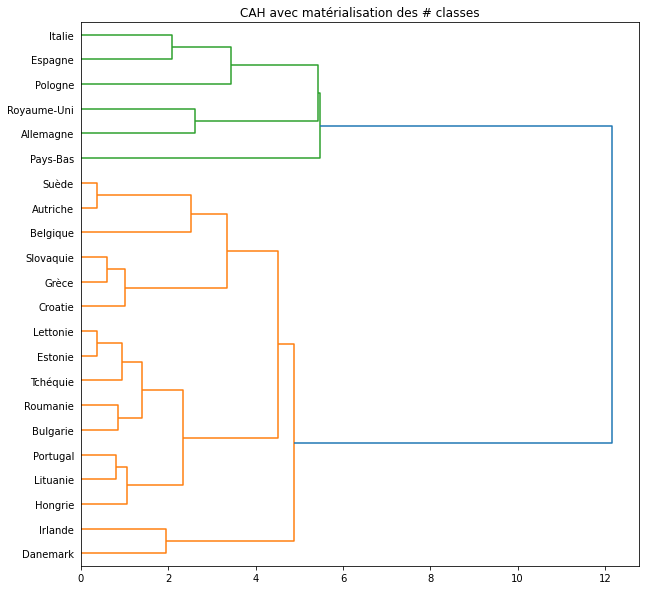

In [21]:
# Création d'un dendrogramme avec les clusters en couleurs et création d'un DF contenant le numéro du groupe 

Z=linkage(data_cr,method='ward',metric='euclidean')
fig=plt.figure(figsize=(10,10)) 
plt.title('CAH avec matérialisation des # classes')
dendrogram(Z,labels=df_ue.index,orientation='right',color_threshold=8)

plt.savefig('cah_ue.png')
plt.show()

 # découpage à la hauteur t = n ==> identifiants de n groupes obtenus
groupes_cah = fcluster(Z,t=7,criterion='distance')

# print(groupes_cah)
groupes_cah_ue=pd.DataFrame(groupes_cah, index=df_ue.index,columns=['CAH'])

### Section 2.2  Méthode des K-means <a class="anchor" id="Section12.2"></a>

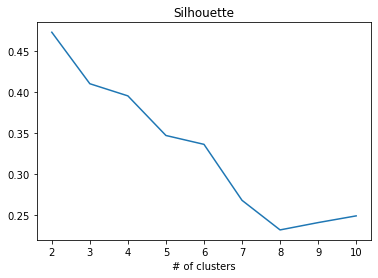

In [22]:
# utilisation de la métrique "silhouette"
# faire varier le nombre de clusters 2 à 10

res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(data_cr)
    res[k] = metrics.silhouette_score(data_cr,km.labels_)

# graphique
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

***
**Interprétation**    
>Le nombre optimal de clusters calculé à partir de l'algorithme des K-means est 2.    
>
***

In [23]:
# K-means sur les données centrée reduites

kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(data_cr)

KMeans(n_clusters=2)

In [24]:
# index triés des groupes
idk=np.argsort(kmeans.labels_)

# affichage des observations et de leurs groupes
groupes_kmeans_ue=pd.DataFrame(kmeans.labels_[idk],index=df_ue.index[idk],columns=['K-means'])
groupes_kmeans_ue

,K-means
Zone,
Grèce,0
Suède,0
Roumanie,0
Portugal,0
Lituanie,0
Lettonie,0
Hongrie,0
Slovaquie,0
Tchéquie,0


In [25]:
# distances aux centres de classes pour chaque individu
df_ue_k=pd.DataFrame(kmeans.transform(data_cr),df_ue.index)

# On met les plus petites valeurs par ligne (distance au centre des goupes) en couleur
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_ue_k=df_ue_k.style.apply(highlight_min, props='color:white;background-color:darkblue', axis=1)


df_ue_k

,0,1
Zone,,
Allemagne,5.499405,2.256577
Autriche,1.117902,4.256141
Belgique,2.448639,3.885508
Bulgarie,1.249158,4.495854
Croatie,1.987248,5.303674
Danemark,1.729281,4.035850
Espagne,3.993794,1.807676
Estonie,0.709435,4.708376
Irlande,3.050000,4.835545


In [26]:
# correspondance entre les groupes de la CAH et ceux des K-means

df_methodes=pd.crosstab(groupes_cah_ue['CAH'],groupes_kmeans_ue['K-means'])
df_methodes

K-means,0,1
CAH,,
1,16,0
2,0,6


>Pour le groupe "pays de l'UE",  il n'y a pas de différence entre la méthode des K-means et la CAH lorsqu'on scinde les données en 2 groupes.     
Nous obtenons les mêmes groupes.
>

## Partie 3 : Classification des données des pays hors de l'UE    <a class="anchor" id="Partie13"></a> 

### Section 3.1  Classification Ascendante Hiérarchique <a class="anchor" id="Section13.1"></a>

In [27]:
df_hors_ue

,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Production,pib
Zone,,,,,,,
Arabie saoudite,43.36,1435.00,10,722.00,1435.00,616.00,55263
Azerbaïdjan,13.11,129.00,0,27.00,129.00,104.00,17433
Bahamas,43.17,26.00,0,24.00,16.00,6.00,25080
Canada,39.02,1433.00,163,182.00,1433.00,1417.00,48141
Chili,36.36,672.00,115,155.00,672.00,712.00,24588
Corée du Sud,9.16,448.50,3,68.50,447.50,440.50,39387
Gabon,29.33,78.00,0,76.00,61.00,4.00,19266
Irak,14.95,566.00,0,470.00,561.00,96.00,17004
Japon,18.50,2415.00,10,1069.00,2359.00,2215.00,42659


In [28]:
df_hors_ue.index

Index(['Arabie saoudite', 'Azerbaïdjan', 'Bahamas', 'Canada', 'Chili',
       'Corée du Sud', 'Gabon', 'Irak', 'Japon', 'Kazakhstan', 'Koweït',
       'Macédoine', 'Mexique', 'Oman', 'République dominicaine', 'Suisse',
       'Trinité-et-Tobago'],
      dtype='object', name='Zone')

In [29]:
# Nous travaillons avec les données centrées-reduites

data_c = preprocessing.StandardScaler().fit(df_hors_ue)
data_cr = data_c.transform(df_hors_ue)

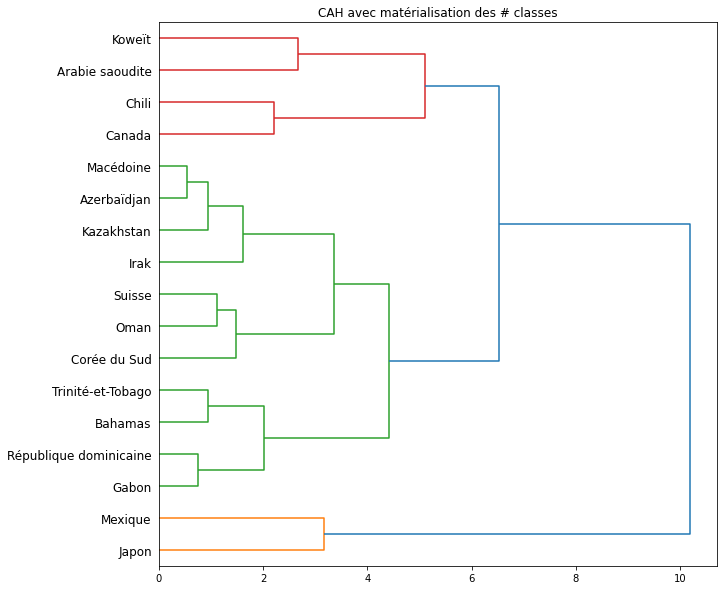

In [30]:
# Création d'un dendrogramme avec les clusters en couleurs et création d'un DF contenant le numéro du groupe 

Z=linkage(data_cr,method='ward',metric='euclidean')
fig=plt.figure(figsize=(10,10)) 
plt.title('CAH avec matérialisation des # classes')
dendrogram(Z,labels=df_hors_ue.index,orientation='right',color_threshold=6)

plt.savefig('cah_hors_ue.png')
plt.show()

 # découpage à la hauteur t = n ==> identifiants de n groupes obtenus
groupes_cah = fcluster(Z,t=6,criterion='distance')

# print(groupes_cah)
groupes_cah_hors_ue=pd.DataFrame(groupes_cah, index=df_hors_ue.index,columns=['CAH'])

### Section 2.2  Méthode des K-means <a class="anchor" id="Section12.2"></a>

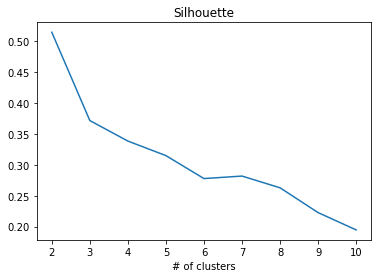

In [31]:
# utilisation de la métrique "silhouette"
# faire varier le nombre de clusters 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(data_cr)
    res[k] = metrics.silhouette_score(data_cr,km.labels_)

# graphique
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

***
**Interprétation**    
>Le nombre optimal de cluster calculé à partir de l'algorithme des K-means est 2.    
Nous choisirons 2 groupes pour le reste de l'étude
>
***

In [32]:
# K-means sur les données centrée reduites

kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(data_cr)

KMeans(n_clusters=2)

In [33]:
# index triés des groupes
idk=np.argsort(kmeans.labels_)

# affichage des observations et de leurs groupes
groupes_kmeans_hors_ue=pd.DataFrame(kmeans.labels_[idk],index=df_hors_ue.index[idk],columns=['K-means'])
groupes_kmeans_hors_ue

,K-means
Zone,
Arabie saoudite,0
République dominicaine,0
Oman,0
Macédoine,0
Koweït,0
Kazakhstan,0
Suisse,0
Trinité-et-Tobago,0
Gabon,0


In [34]:
# distances aux centres de classes pour chaque individu
df_hors_ue_k=pd.DataFrame(kmeans.transform(data_cr),df_hors_ue.index)

# On met les plus petites valeurs par ligne (distance au centre des goupes) en couleur
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_hors_ue_k=df_hors_ue_k.style.apply(highlight_min, props='color:white;background-color:darkblue', axis=1)


df_hors_ue_k

,0,1
Zone,,
Arabie saoudite,2.795123,4.053076
Azerbaïdjan,1.752343,6.086190
Bahamas,1.465762,6.275175
Canada,3.868782,5.361404
Chili,2.324779,5.531115
Corée du Sud,1.652433,5.568342
Gabon,1.173722,6.046578
Irak,1.865444,5.106882
Japon,4.532252,1.579937


> Après plusieurs essais de l'algorithme K-means, pour un nombre de classes variant de 5 à 8:   
**Premièrement**, à chaque essais il ressort un groupe énome variant entre 50% 90%, la majorité des pays selectionnés ont un comportement très proche.     
**Deuxièment**, nous retiendrons 8 classes
>

In [35]:
# correspondance entre les groupes de la CAH et ceux des K-means

df_methodes=pd.crosstab(groupes_cah_hors_ue['CAH'],groupes_kmeans_hors_ue['K-means'])
df_methodes

K-means,0,1
CAH,,
1,0,2
2,11,0
3,4,0


>Pour le groupe "pays de l'UE",  il n'y a pas de différence entre la méthode des K-means et la CAH lorsqu'on scinde les données en 2 groupes.   
Il n'y a par contre une différence lorsque l'on choisi 3 clusters, alors il n'y a plus d'égalité entre les clusters.    
J'ai une préférence soit pour les 3 clusters de la CAH soit pour les 2 clusters des K-means.
>

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

#   <font color="#8333ff"> ANALYSE EN COMPOSANTES PRINCIPALES (ACP)

## Présentation des méthodes <a class="anchor" id="Présentation2"></a>

> l'ACP est une méthode statistique qui permet de représenter les données en 2 dimensions dans un graphique facilement interprétables.    
Il sera effectué dans cette étude 3 ACP:       
-- **premièrement** sur les données de l'UE    
-- **Deuxièment** sur les pays hors UE     
-- **Troisièment** on utilisera le cadre hors-UE pour ajouter les individus supplémentaires et les variables supplémentaires. On utilise ce cadre afin de ne pas 'écraser' les données.

##  CHAP 2 : ACP sur les pays de l'UE  <a class="anchor" id="CHAP2"></a>

## Partie 2 .1 :  Préparation des données <a class="anchor" id="Partie21"></a>

### Section 2.11 Importation des données <a class="anchor" id="Section21.1"></a>

In [36]:
data=df_ue

In [37]:
data

,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Production,pib
Zone,,,,,,,
Allemagne,19.47,1739.00,646,842.00,1609.00,1514.00,50206
Autriche,18.20,173.00,78,110.00,160.00,148.00,49247
Belgique,12.65,152.00,656,338.00,144.00,463.00,46301
Bulgarie,22.06,157.00,45,108.00,157.00,107.00,21578
Croatie,10.77,45.00,17,24.00,45.00,61.00,24095
Danemark,28.98,167.00,139,133.00,166.00,173.00,49613
Espagne,30.39,1497.00,212,205.00,1418.00,1515.00,38171
Estonie,21.26,29.00,11,21.00,28.00,20.00,31473
Irlande,25.82,128.00,93,99.00,123.00,110.00,72632


In [38]:
# On nomme le DF X
X=data

# dimension
print(X.shape)

# nombre d'observation
n=X.shape[0]
p=X.shape[1]

(22, 7)


### Section 2.12 Centrage & Réduction des données <a class="anchor" id="Section21.2"></a>

In [39]:
# instanciation
sc=StandardScaler()

# on travaille avec des données centrées reduites
Z=sc.fit_transform(X)

In [40]:
# on vérifie que les données soient centrées
np.mean(Z,axis=0)

# et réduite
np.std(Z,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1., 1.])

## Partie 2.2 : Lancement de l'ACP  (scikit-learn) <a class="anchor" id="Partie22"></a>

### Section 22.1 Instanciation et lancement des calculs <a class="anchor" id="Section22.1"></a>

In [41]:
acp=PCA(svd_solver='full')

>Le paramètre `svd_solver = 'full'` indique l'algorithme utilisé pour la décomposition en valeur singulière.    
nous choisissons la méthode exacte.

In [42]:
acp

PCA(svd_solver='full')

In [43]:
# calculs
coord1 = acp.fit_transform(Z)

# nombre de composantes calculées
print(acp.n_components_)

7


In [44]:
df_coord1=pd.DataFrame(coord1,data.index)
df_coord1

,0,1,2,3,4,5,6
Zone,,,,,,,
Allemagne,4.04,1.22,-0.69,-1.24,-0.45,0.04,0.02
Autriche,-1.08,0.85,0.49,-0.46,0.39,0.00,0.00
Belgique,-0.23,2.05,-0.89,0.20,0.04,0.00,-0.01
Bulgarie,-1.35,-0.88,-0.49,0.11,-0.67,-0.03,-0.01
Croatie,-2.12,0.01,-1.54,-0.50,0.24,-0.03,0.00
Danemark,-0.55,0.17,1.65,0.33,-0.28,0.00,-0.01
Espagne,2.50,-1.50,0.56,-0.21,0.51,-0.07,0.03
Estonie,-1.69,-0.37,0.05,0.06,-0.17,-0.04,0.00
Irlande,-0.59,1.53,2.58,-0.22,0.64,0.02,-0.01


### Section 22.2 Valeurs propres et scree plot <a class="anchor" id="Section22.2"></a>

La propriété .explained_variance_ semble bonne pour obtenir les variances(valeurs propres , λ) associées aux axes factoriels.

In [45]:
# variances expliquée
(acp.explained_variance_)

array([4.15253468e+00, 1.30698299e+00, 8.88336417e-01, 6.77949216e-01,
       3.05871407e-01, 1.47849983e-03, 1.80127825e-04])

Nous n'avons pas les bonnes valeurs, il faut ajouter une correction

In [46]:
# valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[3.96378310e+00 1.24757467e+00 8.47957489e-01 6.47133343e-01
 2.91968161e-01 1.41129529e-03 1.71940196e-04]


***
>Nous aurion pu obtenir les bonnes valeurs propre en passant par les valeurs singulières `.singular_values_` issues    
de la factorisation de la matrice des données centrées reduites.
***

In [47]:
# ou bien en passant par les valeurs singulières
print (acp.singular_values_**2/n)

[3.96378310e+00 1.24757467e+00 8.47957489e-01 6.47133343e-01
 2.91968161e-01 1.41129529e-03 1.71940196e-04]


>PCA fournit également les proportions de variances associées aux axes.      
Il n'est pas nécessaire d'effectuer une correction dans ce cas.

In [48]:
# proportion de variance expliquée
print(acp.explained_variance_ratio_)

[5.66254729e-01 1.78224953e-01 1.21136784e-01 9.24476204e-02
 4.17097373e-02 2.01613613e-04 2.45628852e-05]


****
#### Variance Expliquée
>La première composante accapare `60,09%` de l'information disponible.      
Nous disposons de `80,12%` ac les 2 premiers facteurs
>
****

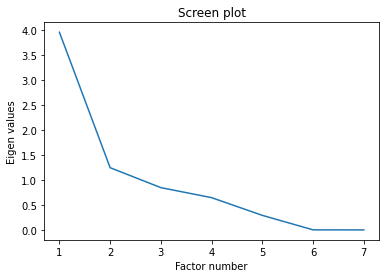

In [49]:
# scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Screen plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

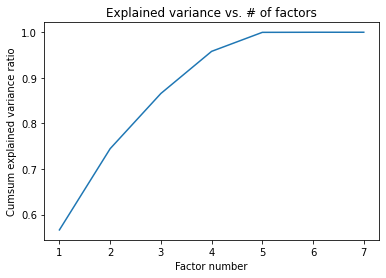

In [50]:
# Cumul de variance expliquée
plt.plot(np.arange(1,1+p), np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel('Factor number')
plt.show()

### Section 22.3 Détermination du nombre de fateur à retenir <a class="anchor" id="Section22.3"></a>

In [51]:
# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [52]:
# test des bâtons brisée
pd.DataFrame({'Val.Propre':eigval, 'Seuils':bs})

,Val.Propre,Seuils
0,3.96,2.59
1,1.25,1.59
2,0.85,1.09
3,0.65,0.76
4,0.29,0.51
5,0.00,0.31
6,0.00,0.14


### Section 22.4 Représentation des individus  <a class="anchor" id="Section22.4"></a>

In [53]:
Quali_ue=groupes_cah_ue.values
modalites=np.unique(groupes_cah_ue)

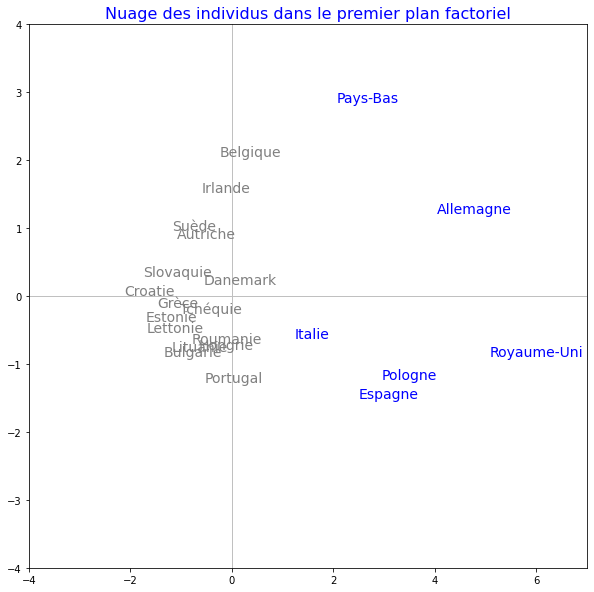

In [54]:
#liste des couleurs
couleurs = ['grey','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-4,7)
axes.set_ylim(-4,4)


#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
#numéro des individus concernés
    numero = np.where(Quali_ue == modalites[c])
#les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(groupes_cah_ue.index[i],(coord1[i,0],coord1[i,1]),color=couleurs[c],fontsize=14)
        
#ajouter les axes
plt.plot([-6,7],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.title('Nuage des individus dans le premier plan factoriel',fontsize=16,color='b')

plt.savefig('acp_ind_ue.png')

#affichage
plt.show()

In [55]:
# Contribution des individus dans l'inertie totale
di=np.sum(Z**2,axis=1)

pd.DataFrame({'Pays':X.index,'d_i':di})

,Pays,d_i
0,Allemagne,20.02
1,Autriche,2.48
2,Belgique,5.11
3,Bulgarie,3.28
4,Croatie,7.18
5,Danemark,3.25
6,Espagne,9.13
7,Estonie,3.05
8,Irlande,9.78
9,Italie,4.18


In [56]:
# qualité de la représentation des individus  COS2
cos2=coord1**2
for j in range(p):
    cos2[:,j]=cos2[:,j]/di
    
pd.DataFrame({'Pays':X.index,'cos2_1':cos2[:,0],'cos2_2':cos2[:,1]})


,Pays,cos2_1,cos2_2
0,Allemagne,0.82,0.07
1,Autriche,0.47,0.29
2,Belgique,0.01,0.83
3,Bulgarie,0.55,0.23
4,Croatie,0.63,0.00
5,Danemark,0.09,0.01
6,Espagne,0.68,0.25
7,Estonie,0.94,0.05
8,Irlande,0.04,0.24
9,Italie,0.37,0.09


In [57]:
# Vérifie la théorie - somme des lignes des cos2=1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Contribution des individus aux axes (CTR)

In [58]:
# Contribution aux axes
ctr=coord1**2
for j in range(p):
    ctr[:,j]=ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Pays':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

,Pays,CTR_1,CTR_2
0,Allemagne,0.19,0.05
1,Autriche,0.01,0.03
2,Belgique,0.00,0.15
3,Bulgarie,0.02,0.03
4,Croatie,0.05,0.00
5,Danemark,0.00,0.00
6,Espagne,0.07,0.08
7,Estonie,0.03,0.01
8,Irlande,0.00,0.08
9,Italie,0.02,0.01


In [59]:
# On vérifie la théorie : ΣCTRik=1
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1.]


### Section 22.5 Représentation des variables  <a class="anchor" id="Section22.5"></a>

>Nous avons besoin des vecteurs propres pour l'analyse des variables. ils sont fournis par le champ `.components_`

In [60]:
# le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.23324308  0.47036973  0.32246715  0.39744297  0.46997241  0.46726086
   0.15230633]
 [-0.44946997 -0.20569533  0.40835545  0.35173149 -0.21737596 -0.13687614
   0.63183033]
 [ 0.68531867 -0.05240031 -0.25928971 -0.11200973 -0.05418265 -0.17079198
   0.64475541]
 [ 0.39029221 -0.31176957  0.70559121 -0.2891845  -0.2948552   0.23018433
  -0.17047192]
 [-0.34865702  0.12779585 -0.03548301 -0.72778458  0.14952883  0.41985696
   0.36405812]
 [ 0.00437428 -0.32602134 -0.40328919  0.3029668  -0.36686313  0.71020818
   0.01660373]
 [ 0.00196807  0.71685005  0.01641449 -0.02628499 -0.69645592 -0.01009721
  -0.00299959]]


>**Point important:**   
les facteurs sont en ligne, les variables en colonne.    
Nous devons en tenir compte pour obtenir les corrélations en les multipliants par la racine carrée des valeurs propres
>

In [61]:
# racine carré des valeurs propres
sqrt_eigval = np.sqrt(eigval)

# corrélation des variables avec les axes
corvar = np.zeros((p,p ))

for k in range(p):
    corvar[: , k] = acp.components_[k, :]*sqrt_eigval[k]

# afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 4.64369528e-01 -5.02034952e-01  6.31073004e-01  3.13968999e-01
  -1.88393609e-01  1.64329534e-04  2.58065328e-05]
 [ 9.36470948e-01 -2.29751158e-01 -4.82526202e-02 -2.50801777e-01
   6.90533099e-02 -1.22477124e-02  9.39976571e-03]
 [ 6.42007974e-01  4.56112140e-01 -2.38765909e-01  5.67610020e-01
  -1.91729171e-02 -1.51504496e-02  2.15236595e-04]
 [ 7.91279223e-01  3.92866077e-01 -1.03143722e-01 -2.32633311e-01
  -3.93251692e-01  1.13816176e-02 -3.44664461e-04]
 [ 9.35679906e-01 -2.42797828e-01 -4.98938771e-02 -2.37195082e-01
   8.07965273e-02 -1.37820245e-02 -9.13234568e-03]
 [ 9.30281424e-01 -1.52883647e-01 -1.57273123e-01  1.85170863e-01
   2.26865840e-01  2.66805399e-02 -1.32400689e-04]
 [ 3.03230515e-01  7.05722146e-01  5.93720486e-01 -1.37135452e-01
   1.96715450e-01  6.23755782e-04 -3.93324792e-05]]


In [62]:
# On affiche pour les 2 premiers axes
pd.DataFrame({'Variables':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

,Variables,COR_1,COR_2
0,dispo_kg,0.46,-0.50
1,dispo_int,0.94,-0.23
2,Exportation,0.64,0.46
3,Importation,0.79,0.39
4,Nourriture,0.94,-0.24
5,Production,0.93,-0.15
6,pib,0.30,0.71


### Le cercle des corrélations

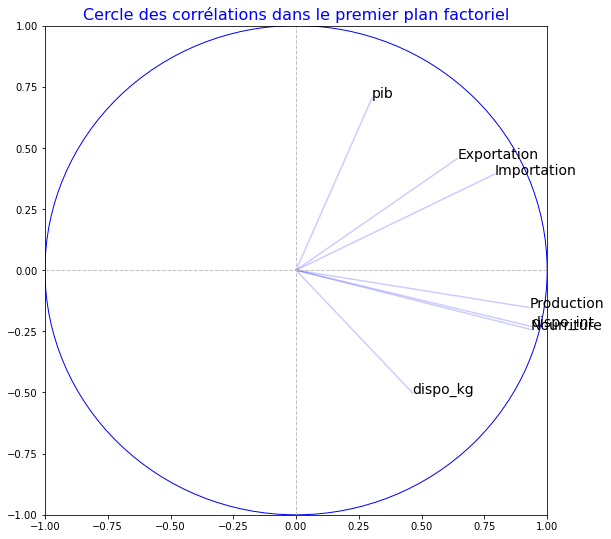

In [63]:
# cercle des correlations
fig,axes=plt.subplots(figsize=(9,9))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),fontsize=14)
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)
    
# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle des corrélations dans le premier plan factoriel',fontsize=16,color='b')

plt.savefig('acp_var_ue.png')

# affichage
plt.show()

#### Qualité de représentation des variables (COS2)

In [64]:
# cosinus carré des variables
cos2var=corvar**2
pd.DataFrame({'Variables':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})

,Variables,COS2_1,COS2_2
0,dispo_kg,0.22,0.25
1,dispo_int,0.88,0.05
2,Exportation,0.41,0.21
3,Importation,0.63,0.15
4,Nourriture,0.88,0.06
5,Production,0.87,0.02
6,pib,0.09,0.50


#### Contribution des variables aux axes (CTR)       
####  $CTR_{ij} = \frac{r^2_{jk}}{(λ_k}$

In [65]:
# contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
    
# on n'affiche que les 2 premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

            id  CTR_1  CTR_2
0     dispo_kg   0.05   0.20
1    dispo_int   0.22   0.04
2  Exportation   0.10   0.17
3  Importation   0.16   0.12
4   Nourriture   0.22   0.05
5   Production   0.22   0.02
6          pib   0.02   0.40


***
[<font color=blue> Retour à la Table Des Matières](#retour)

***

## CHAP 3 : ACP sur les pays Extra-Européens <a class="anchor" id="CHAP3"></a>

***
********

### PARTIE 3.1 Préparation des données <a class="anchor" id="Partie31"></a>

### Section 3.11 Importation des données <a class="anchor" id="Section31.1"></a>

In [66]:
data=df_hors_ue

In [67]:
data

,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Production,pib
Zone,,,,,,,
Arabie saoudite,43.36,1435.00,10,722.00,1435.00,616.00,55263
Azerbaïdjan,13.11,129.00,0,27.00,129.00,104.00,17433
Bahamas,43.17,26.00,0,24.00,16.00,6.00,25080
Canada,39.02,1433.00,163,182.00,1433.00,1417.00,48141
Chili,36.36,672.00,115,155.00,672.00,712.00,24588
Corée du Sud,9.16,448.50,3,68.50,447.50,440.50,39387
Gabon,29.33,78.00,0,76.00,61.00,4.00,19266
Irak,14.95,566.00,0,470.00,561.00,96.00,17004
Japon,18.50,2415.00,10,1069.00,2359.00,2215.00,42659


In [68]:
# On nomme le DF X
X=data

# dimension
print(X.shape)

# nombre d'observation
n=X.shape[0]
p=X.shape[1]

(17, 7)


### Section 3.11 Centrage & Réduction des données <a class="anchor" id="Section31.2"></a>

In [69]:
# instanciation
sc=StandardScaler()

# on travaille avec des données centrées reduites
Z=sc.fit_transform(X)

In [70]:
# on vérifie que les données soient centrées
np.mean(Z,axis=0)

# et réduite
np.std(Z,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1., 1.])

## Partie 3.2 : Lancement de l'ACP (scikit-learn) <a class="anchor" id="Partie32"></a>

### Section 3.21 Instanciation et lancement des calculs <a class="anchor" id="Section32.1"></a>

In [71]:
acp=PCA(svd_solver='full')

>Le paramètre `svd_solver = 'full'` indique l'algorithme utilisé pour la décomposition en valeur singulière.    
nous choisissons la méthode exacte.

In [72]:
acp

PCA(svd_solver='full')

In [73]:
# calculs
coord2 = acp.fit_transform(Z)

# nombre de composantes calculées
print(acp.n_components_)

7


In [74]:
df_coord2=pd.DataFrame(coord2,data.index)
df_coord2

,0,1,2,3,4,5,6
Zone,,,,,,,
Arabie saoudite,1.39,0.97,1.39,0.67,0.66,-0.26,-0.01
Azerbaïdjan,-1.28,-1.38,-0.53,-0.41,-0.16,-0.02,-0.01
Bahamas,-1.36,0.29,-0.31,1.20,-0.06,0.08,0.00
Canada,1.44,2.76,-1.36,-1.42,-0.09,-0.03,-0.00
Chili,0.12,1.35,-1.75,-0.54,0.36,0.05,0.01
Corée du Sud,-0.70,-0.90,0.46,-1.11,-0.50,-0.00,-0.01
Gabon,-1.28,-0.57,-0.47,0.52,0.06,0.02,0.01
Irak,-0.24,-1.52,-0.23,-0.17,0.79,-0.16,0.00
Japon,3.63,-0.79,0.98,-0.50,0.48,0.41,-0.00


### Section 3.22 Valeurs propres et scree plot <a class="anchor" id="Section32.2"></a>

La propriété .explained_variance_ semble bonne pour obtenir les variances(valeurs propres , λ) associées aux axes factoriels.

In [75]:
# variances expliquée
(acp.explained_variance_)

array([4.03065999e+00, 1.46828478e+00, 9.71167998e-01, 7.93322879e-01,
       1.53909396e-01, 2.00980570e-02, 5.69026087e-05])

Nous n'avons pas les bonnes valeurs, il faut ajouter une correction

In [76]:
# valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[3.79356234e+00 1.38191509e+00 9.14040469e-01 7.46656827e-01
 1.44855903e-01 1.89158184e-02 5.35553965e-05]


>Nous aurion pu obtenir les bonnes valeurs propre en passant par les valeurs singulières `.singular_values_` issues    
de la factorisation de la matrice des données centrées reduites.

In [77]:
# ou bien en passant par les valeurs singulières
print (acp.singular_values_**2/n)

[3.79356234e+00 1.38191509e+00 9.14040469e-01 7.46656827e-01
 1.44855903e-01 1.89158184e-02 5.35553965e-05]


>PCA fournit également les proportions de variances associées aux axes.      
Il n'est pas nécessaire d'effectuer une correction dans ce cas.

In [78]:
# proportion de variance expliquée
print(acp.explained_variance_ratio_)

[5.41937477e-01 1.97416441e-01 1.30577210e-01 1.06665261e-01
 2.06937004e-02 2.70225977e-03 7.65077092e-06]


#### Variance Expliquée
>La première composante accapare `54,19%` de l'information disponible.      
Nous disposons de `73,92%` ac les 2 premiers facteurs
>

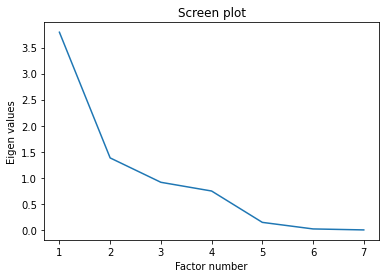

In [79]:
# screen plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Screen plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

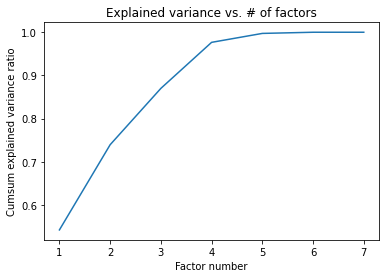

In [80]:
# Cumul de variance expliquée
plt.plot(np.arange(1,1+p), np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel('Factor number')
plt.show()

### Section 3.23 Détermination du nombre de fateur à retenir <a class="anchor" id="Section32.3"></a>

In [81]:
# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [82]:
# test des bâtons brisée
pd.DataFrame({'Val.Propre':eigval, 'Seuils':bs})

,Val.Propre,Seuils
0,3.79,2.59
1,1.38,1.59
2,0.91,1.09
3,0.75,0.76
4,0.14,0.51
5,0.02,0.31
6,0.00,0.14


### Section 3.24 Représentation des individus  <a class="anchor" id="Section32.4"></a>

In [83]:
Quali_hors_ue=groupes_cah_hors_ue.values
modalites=np.unique(groupes_cah_hors_ue)

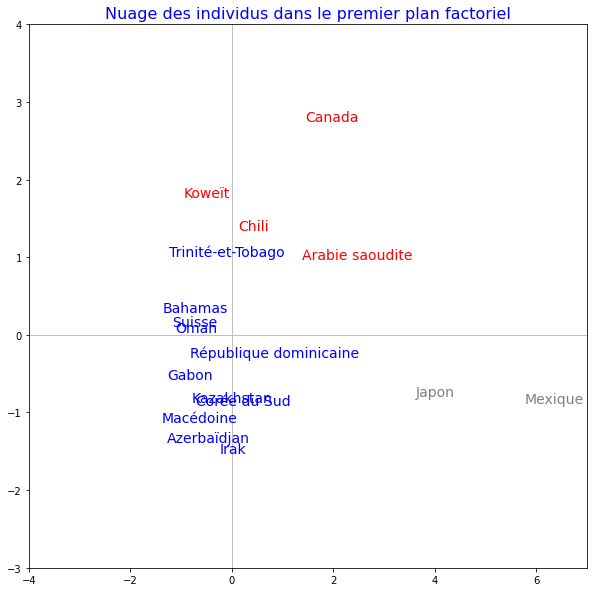

In [84]:
#liste des couleurs
couleurs = ['grey','b','r']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-4,7)
axes.set_ylim(-3,4)


#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
#numéro des individus concernés
    numero = np.where(Quali_hors_ue == modalites[c])
#les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(groupes_cah_hors_ue.index[i],(coord2[i,0],coord2[i,1]),color=couleurs[c],fontsize=14)
        
#ajouter les axes
plt.plot([-6,7],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.title('Nuage des individus dans le premier plan factoriel',fontsize=16,color='b')

plt.savefig('acp_ind_hors_ue.png')

#affichage
plt.show()

In [85]:
# Contribution des individus dans l'inertie totale
di=np.sum(Z**2,axis=1)

pd.DataFrame({'Pays':X.index,'d_i':di})

,Pays,d_i
0,Arabie saoudite,5.77
1,Azerbaïdjan,4.01
2,Bahamas,3.47
3,Canada,13.53
4,Chili,5.31
5,Corée du Sud,3.00
6,Gabon,2.46
7,Irak,3.08
8,Japon,15.36
9,Kazakhstan,1.52


In [86]:
# qualité de la représentation des individus  COS2
cos2=coord2**2
for j in range(p):
    cos2[:,j]=cos2[:,j]/di
    
pd.DataFrame({'Pays':X.index,'cos2_1':cos2[:,0],'cos2_2':cos2[:,1]})

,Pays,cos2_1,cos2_2
0,Arabie saoudite,0.33,0.16
1,Azerbaïdjan,0.41,0.48
2,Bahamas,0.53,0.02
3,Canada,0.15,0.56
4,Chili,0.00,0.34
5,Corée du Sud,0.16,0.27
6,Gabon,0.67,0.13
7,Irak,0.02,0.75
8,Japon,0.86,0.04
9,Kazakhstan,0.42,0.50


In [87]:
# Vérifie la théorie - somme des lignes des cos2=1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Contribution des iindividus aux axes (CTR)

In [88]:
# Contribution aux axes
ctr=coord2**2
for j in range(p):
    ctr[:,j]=ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Pays':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

,Pays,CTR_1,CTR_2
0,Arabie saoudite,0.03,0.04
1,Azerbaïdjan,0.03,0.08
2,Bahamas,0.03,0.00
3,Canada,0.03,0.32
4,Chili,0.00,0.08
5,Corée du Sud,0.01,0.03
6,Gabon,0.03,0.01
7,Irak,0.00,0.10
8,Japon,0.20,0.03
9,Kazakhstan,0.01,0.03


In [89]:
# On vérifie la théorie : ΣCTRik=1
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1.]


### Section 3.25 Représentation des variables  <a class="anchor" id="Section32.5"></a>

>Nous avons besoin des vecteurs propres pour l'analyse des variables. ils sont fournis par le champ `.components_`

In [90]:
# le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.03255276  0.50996664  0.10888958  0.46311403  0.5105617   0.5015341
   0.01825107]
 [ 0.62929047 -0.03380586  0.57250425 -0.13712087 -0.0267217   0.00465441
   0.50552123]
 [-0.0645506  -0.01794821 -0.55772344  0.25523787 -0.01749445 -0.10273298
   0.78003151]
 [ 0.77173515  0.03988218 -0.52763613  0.0652875   0.03184157 -0.05639449
  -0.34055499]
 [ 0.03711271 -0.21495716  0.26064579  0.81900978 -0.19131172 -0.39684433
  -0.14006151]
 [ 0.04258905 -0.43880159 -0.05369053  0.16245652 -0.44629598  0.75968363
  -0.0080756 ]
 [-0.00084782  0.70577975  0.01037898  0.0120537  -0.70817546 -0.01014083
   0.00242793]]


>**Point important:**   
les facteurs sont en ligne, les variables en colonne.    
Nous devons en tenir compte pour obtenir les corrélations en les multipliants par la racine carrée des valeurs propres
>

In [91]:
# racine carré des valeurs propres
sqrt_eigval = np.sqrt(eigval)

# corrélation des variables avec les axes
corvar = np.zeros((p,p ))

for k in range(p):
    corvar[: , k] = acp.components_[k, :]*sqrt_eigval[k]

# afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 6.34032411e-02  7.39761683e-01 -6.17139040e-02  6.66850994e-01
   1.41250736e-02  5.85747660e-03 -6.20449594e-06]
 [ 9.93265560e-01 -3.97404413e-02 -1.71594739e-02  3.44619127e-02
  -8.18125657e-02 -6.03504843e-02  5.16500577e-03]
 [ 2.12084985e-01  6.73006706e-01 -5.33214084e-01 -4.55926722e-01
   9.92016292e-02 -7.38431590e-03  7.59549746e-05]
 [ 9.02010415e-01 -1.61192282e-01  2.44021349e-01  5.64144726e-02
   3.11714630e-01  2.23434231e-02  8.82108437e-05]
 [ 9.94424561e-01 -3.14126683e-02 -1.67256518e-02  2.75140758e-02
  -7.28131268e-02 -6.13812242e-02 -5.18253798e-03]
 [ 9.76841450e-01  5.47149123e-03 -9.82183397e-02 -4.87300905e-02
  -1.51038712e-01  1.04482929e-01 -7.42121765e-05]
 [ 3.55477378e-02  5.94264894e-01  7.45752739e-01 -2.94271204e-01
  -5.33073261e-02 -1.11067576e-03  1.77679386e-05]]


In [92]:
# On affiche pour les 2 premiers axes
pd.DataFrame({'Variables':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

,Variables,COR_1,COR_2
0,dispo_kg,0.06,0.74
1,dispo_int,0.99,-0.04
2,Exportation,0.21,0.67
3,Importation,0.90,-0.16
4,Nourriture,0.99,-0.03
5,Production,0.98,0.01
6,pib,0.04,0.59


### Le cercle des corrélations

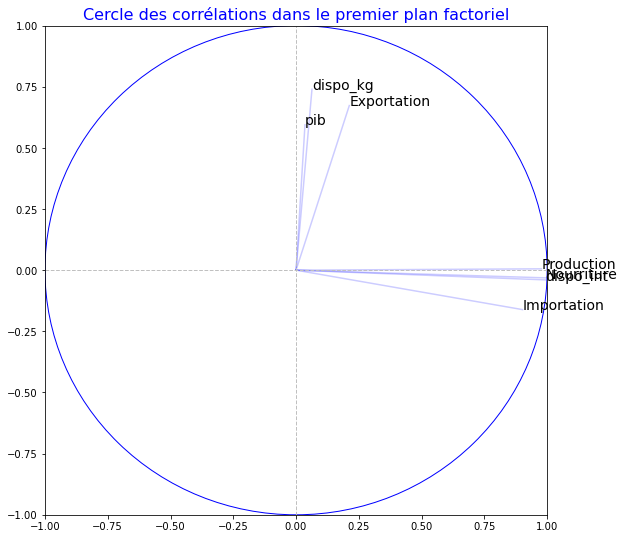

In [93]:
# cercle des correlations
fig,axes=plt.subplots(figsize=(9,9))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),fontsize=14)
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)
    
# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle des corrélations dans le premier plan factoriel',fontsize=16,color='b')

plt.savefig('acp_var_hors_ue.png')

# affichage
plt.show()

>On perçoit clairement l'effet de taille sur le premier axe: les voitures puissantes et rapides sont aussi les plus lourdes et imposante, la relation globale entre les variables est en réalité determinée par la cylinfrée (CYL).

#### Qualité de représentation des variables $COS^2$

In [94]:
# cosinus carré des variables
cos2var=corvar**2
pd.DataFrame({'Variables':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})

,Variables,COS2_1,COS2_2
0,dispo_kg,0.00,0.55
1,dispo_int,0.99,0.00
2,Exportation,0.04,0.45
3,Importation,0.81,0.03
4,Nourriture,0.99,0.00
5,Production,0.95,0.00
6,pib,0.00,0.35


#### Contribution des variables aux axes (CTR)       
####  $CTR_{ij} = \frac {r^2_{ij}}{λ_k}$ 

In [95]:
# contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
    
# on n'affiche que les 2 premiers axes
pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

,id,CTR_1,CTR_2
0,dispo_kg,0.00,0.40
1,dispo_int,0.26,0.00
2,Exportation,0.01,0.33
3,Importation,0.21,0.02
4,Nourriture,0.26,0.00
5,Production,0.25,0.00
6,pib,0.00,0.26


***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

 ## CHAP4 :  Traitement des individus et variables supplémentaires <a class="anchor" id="CHAP4"></a>

****
****

### Section 4.1 Individus supplémentaires <a class="anchor" id="Section41"></a>

In [96]:
ind_Sup=pd.read_csv("ind_sup.csv",sep=";",index_col=0)

In [97]:
ind_Sup

,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Production,pib
Zone,,,,,,,
Biélorussie,27.98,265.00,152,21.00,264.00,463.00,18616
Chine,22.75,9473.00,292,306.50,9151.50,9444.00,16624
France,22.90,1573.00,501,506.00,1485.00,1750.00,43551
Russie,30.98,4556.00,115,226.00,4509.00,4444.00,28712


Nous devons centrée et reduire les variables des individus supplémentaires à l'aide des paramètres (moyenne et écart-type) des données actives ayant servi à construire le reère factoriel 

In [98]:
# centrage et reduction avec les paramètres des individus actifs
Zind_Sup=sc.transform(ind_Sup)
pd.DataFrame(Zind_Sup)

,0,1,2,3,4,5,6
0,-0.07,-0.45,2.97,-0.71,-0.45,-0.11,-0.90
1,-0.47,8.13,6.13,0.15,8.10,10.03,-1.02
2,-0.45,0.77,10.85,0.76,0.73,1.34,0.58
3,0.16,3.55,2.14,-0.09,3.63,4.38,-0.30


In [99]:
# projection dans l'espace factoriel
coordSup=acp.transform(Zind_Sup)
pd.DataFrame(coordSup)

,0,1,2,3,4,5,6
0,-0.54,1.33,-2.51,-1.38,0.54,0.04,0.02
1,14.01,2.23,-5.47,-3.22,-5.43,0.12,-0.04
2,2.96,6.08,-5.54,-6.25,2.51,-0.13,0.14
3,6.05,0.99,-2.04,-0.90,-2.67,0.03,-0.09


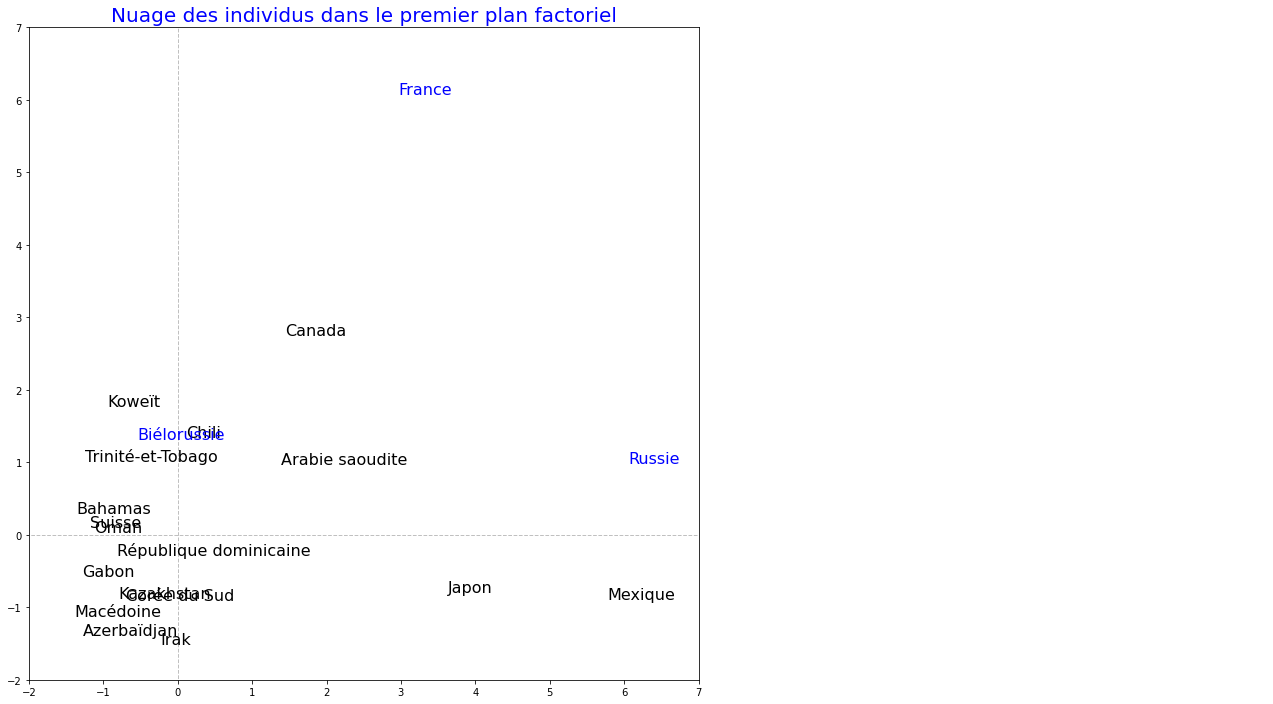

In [100]:
# positionnement des individus supplémentaires dans le premeier plan

fig,axes=plt.subplots(figsize=(12,12))
axes.set_xlim(-2,7)
axes.set_ylim(-2,7)

# étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord2[i,0],coord2[i,1]),fontsize=16)

# etiquette des points supplémmentaires (illustratif) en bleu
for i in range(coordSup.shape[0]):
    plt.annotate(ind_Sup.index[i],(coordSup[i,0],coordSup[i,1]),color='blue',fontsize=16)
    
# ajouter des axes
plt.plot([-6,7],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-6,7],color='silver',linestyle='--',linewidth=1)
  
plt.title('Nuage des individus dans le premier plan factoriel',fontsize=20,color='b')

plt.savefig('acp_ind_sup.png')

# affichage
plt.show()

### Section 4.2 Variables supplémentaires <a class="anchor" id="Section42"></a>

In [101]:
# on reccupère les variables sup
Var_Sup=pd.read_csv("var_sup_p9_hors_ue.csv",sep=";",index_col=0)
Var_Sup

,Pertes,Résidus,autres,Var_stock
Zone,,,,
Arabie saoudite,0,0.00,0,-108.00
Azerbaïdjan,0,0.00,0,2.00
Bahamas,0,0.00,9,4.00
Canada,0,0.00,0,3.00
Chili,0,0.00,0,80.00
Corée du Sud,1,0.00,0,57.50
Gabon,0,0.00,18,2.00
Irak,5,0.00,0,0.00
Japon,56,0.00,0,859.00


In [102]:
# on reccupère les variables quantitatives dans un format np
vsQuanti= Var_Sup.iloc[:,:4].values
print(vsQuanti)

[[   0.     0.     0.  -108. ]
 [   0.     0.     0.     2. ]
 [   0.     0.     9.     4. ]
 [   0.     0.     0.     3. ]
 [   0.     0.     0.    80. ]
 [   1.     0.     0.    57.5]
 [   0.     0.    18.     2. ]
 [   5.     0.     0.     0. ]
 [  56.     0.     0.   859. ]
 [   0.    -2.     2.     8. ]
 [   0.     0.     1.     0. ]
 [   0.     0.     0.     0. ]
 [ 161.     0.     0.    -6. ]
 [   0.     0.    13.     2. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     5. ]
 [   0.     0.     0.     8. ]]


In [103]:
# Corrélation avec les axes fatoriels
corSupp = np.zeros((vsQuanti.shape[1],p))

for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k]=np.corrcoef(vsQuanti[:,j],coord2[:,k])[0,1]
        
# affichage des corrélation avec les axes
print(corSupp)

[[ 0.8705498  -0.24814486 -0.01920887  0.1833036  -0.30801729 -0.03624086
   0.20462453]
 [ 0.10288763  0.18496448  0.03381847  0.0903572  -0.05125193  0.09022481
   0.08918547]
 [-0.30107954 -0.06763332 -0.01991854  0.15026928  0.0255874   0.04961786
   0.62946565]
 [ 0.42391538 -0.17418272  0.17371637 -0.20195819  0.25660704  0.80771293
  -0.0272542 ]]


***
>On a une matrice 2xP:    
4 variables illustratives et p composantes principales générées
***

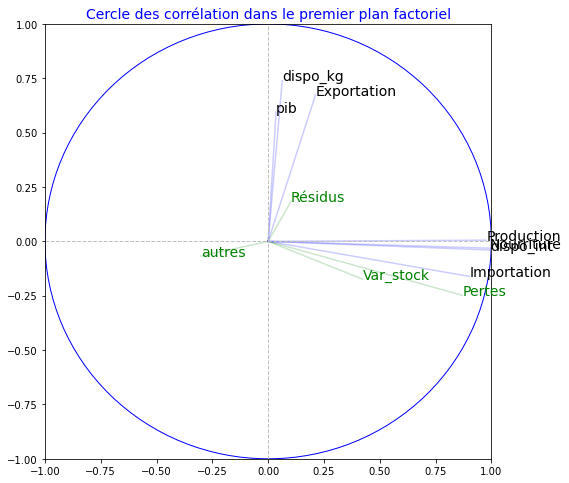

In [104]:
# cercle des corrélations avec var supp
fig,axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# variables actives
for j in range (p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),fontsize=14)
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)
    
# variables illustratives
for j in range(vsQuanti.shape[1]):
    plt.annotate(Var_Sup.columns[j],(corSupp[j,0],corSupp[j,1]),color='g',fontsize=14)
    plt.plot([0,corSupp[j,0]],[0,corSupp[j,1]],color='g',alpha=0.2)

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# ajouter un cercle
cercle = plt.Circle((0,0),1,color='b',fill=False)
axes.add_artist(cercle)

plt.title('Cercle des corrélation dans le premier plan factoriel',fontsize=14,color='b')

plt.savefig('acp_var_total.png')

# affichage
plt.show()

### Section 4.3  Variable qualitative illustrative  <a class="anchor" id="Section43"></a>

In [105]:
# On crée une colonne modalites dans le DF hors UE 
# Cette variable possède 3 modalité

df_hors_ue['modalites']='hors_ue'

df_ue['modalites']='ue'

ind_sup['modalites']='ind_sup'

Var_Sup=pd.concat([df_ue, df_hors_ue,ind_sup])
Var_Sup

,dispo_kg,dispo_int,Exportation,Importation,Nourriture,Production,pib,modalites
Zone,,,,,,,,
Allemagne,19.47,1739.00,646,842.00,1609.00,1514.00,50206,ue
Autriche,18.20,173.00,78,110.00,160.00,148.00,49247,ue
Belgique,12.65,152.00,656,338.00,144.00,463.00,46301,ue
Bulgarie,22.06,157.00,45,108.00,157.00,107.00,21578,ue
Croatie,10.77,45.00,17,24.00,45.00,61.00,24095,ue
Danemark,28.98,167.00,139,133.00,166.00,173.00,49613,ue
Espagne,30.39,1497.00,212,205.00,1418.00,1515.00,38171,ue
Estonie,21.26,29.00,11,21.00,28.00,20.00,31473,ue
Irlande,25.82,128.00,93,99.00,123.00,110.00,72632,ue


In [106]:
Var_Sup.shape

(43, 8)

In [107]:
# On crée un DF dfcoordSup avec les projections des individues sup sur les axes factorielles
dfcoordSup=pd.DataFrame(coordSup,ind_sup.index)
dfcoordSup

,0,1,2,3,4,5,6
Zone,,,,,,,
Biélorussie,-0.54,1.33,-2.51,-1.38,0.54,0.04,0.02
Chine,14.01,2.23,-5.47,-3.22,-5.43,0.12,-0.04
France,2.96,6.08,-5.54,-6.25,2.51,-0.13,0.14
Russie,6.05,0.99,-2.04,-0.90,-2.67,0.03,-0.09


In [108]:
coord=pd.concat([df_coord1,df_coord2,dfcoordSup])
coord

,0,1,2,3,4,5,6
Zone,,,,,,,
Allemagne,4.04,1.22,-0.69,-1.24,-0.45,0.04,0.02
Autriche,-1.08,0.85,0.49,-0.46,0.39,0.00,0.00
Belgique,-0.23,2.05,-0.89,0.20,0.04,0.00,-0.01
Bulgarie,-1.35,-0.88,-0.49,0.11,-0.67,-0.03,-0.01
Croatie,-2.12,0.01,-1.54,-0.50,0.24,-0.03,0.00
Danemark,-0.55,0.17,1.65,0.33,-0.28,0.00,-0.01
Espagne,2.50,-1.50,0.56,-0.21,0.51,-0.07,0.03
Estonie,-1.69,-0.37,0.05,0.06,-0.17,-0.04,0.00
Irlande,-0.59,1.53,2.58,-0.22,0.64,0.02,-0.01


In [109]:
# traitement de variable qualitative supplémentaire
vsQuali=Var_Sup.iloc[:,7]

In [110]:
# on reccupère la liste des modalités
modalites=np.unique(vsQuali)
modalites

array(['hors_ue', 'ind_sup', 'ue'], dtype=object)

In [111]:
#Transformation du DF en np.array
coord=coord.values

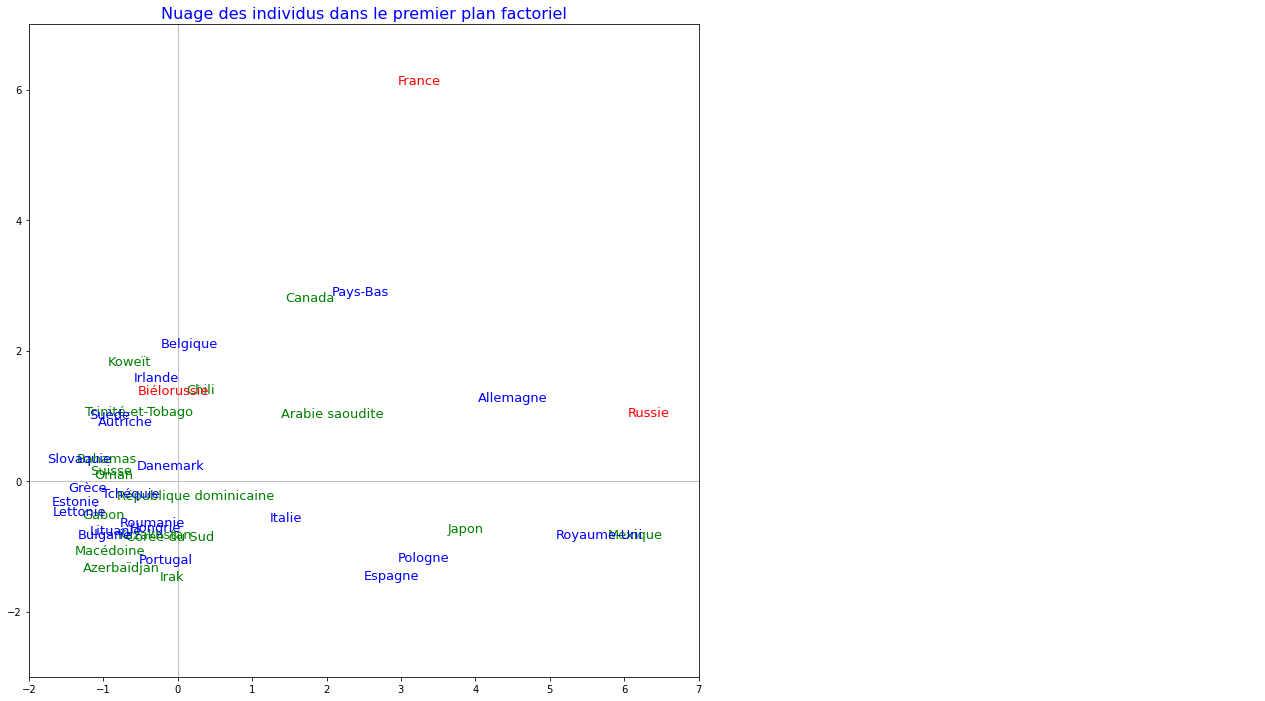

In [112]:
#liste des couleurs
couleurs = ['g','r','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-2,7)
axes.set_ylim(-3,7)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
#numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
#les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(Var_Sup.index[i],(coord[i,0],coord[i,1]),color=couleurs[c],fontsize=13)
        
#ajouter les axes
plt.plot([-6,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,8],color='silver',linestyle='-',linewidth=1)

plt.title('Nuage des individus dans le premier plan factoriel',color='b',fontsize=16)

plt.savefig('acp_ind_total.png')

#affichage
plt.show()

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

***
***

# CHAP 5 :  HEATMAP <a class="anchor" id="CHAP5"></a>

### Section 5.1 : HEATMAP des pays de l'UE <a class="anchor" id="Section51"></a>

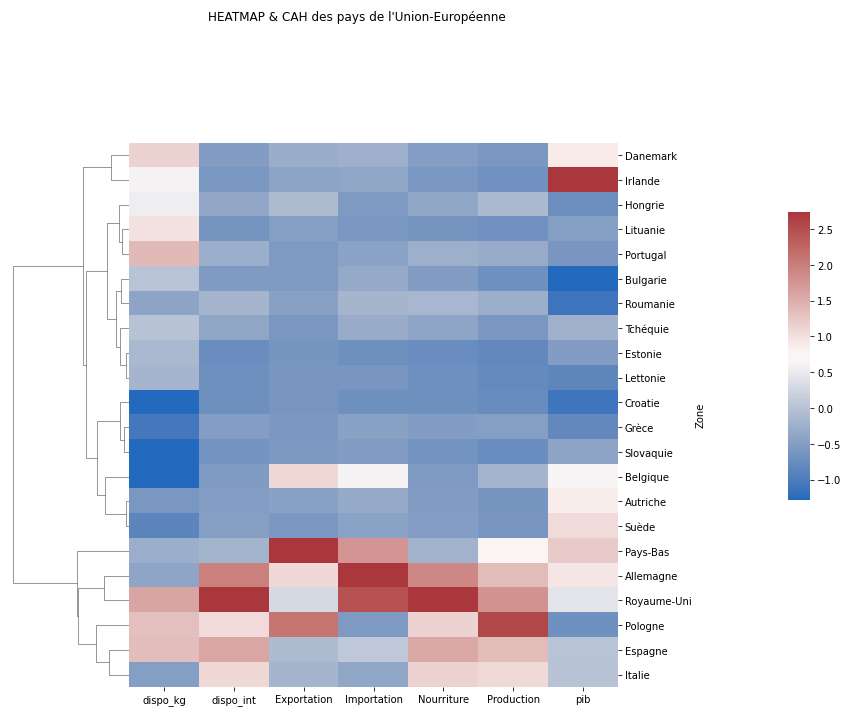

In [113]:
df_ue=df_ue.drop(columns=['modalites'])
g = sns.clustermap(df_ue, cmap="vlag",method='ward',robust=True,
                   z_score=1,row_cluster=True ,
                   col_cluster=False ,cbar_pos=(1.1, .3, .03, .4),
                  )
plt.gcf().suptitle("HEATMAP & CAH des pays de l'Union-Européenne")

plt.savefig('heatmap_ue.png')

### Section 5.2 : HEATMAP des pays de l'UE <a class="anchor" id="Section52"></a>

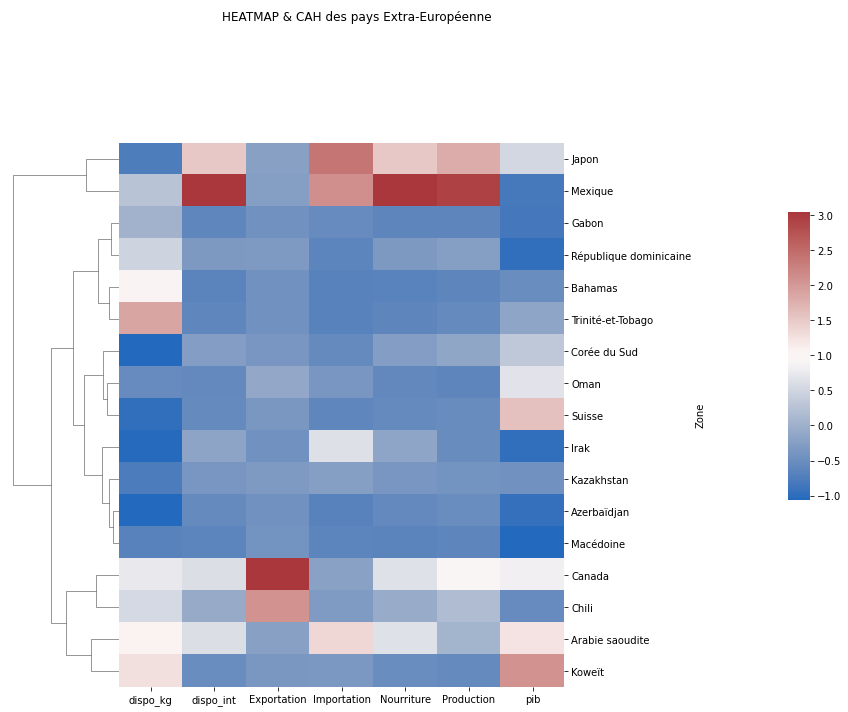

In [114]:
df_hors_ue=df_hors_ue.drop(columns=['modalites'])
g = sns.clustermap(df_hors_ue, cmap="vlag",method='ward',robust=True,
                   z_score=1,row_cluster=True ,
                   col_cluster=False ,cbar_pos=(1.1, .3, .03, .4),
                  )
plt.gcf().suptitle("HEATMAP & CAH des pays Extra-Européenne")
plt.savefig('heatmap_hors_ue.png')

# CONCLUSION & RECOMMANDATIONS <a class="anchor" id="conclusion"></a>

****

>Cette étude n’a pas pour vocation de recommander un pays en particulier, mais présente, à travers différentes méthodes statistiques, des groupes de pays (Clusters) ayant des comportements similaires.  
>
>Une fois la stratégie d’exportation mis en place par l’entreprise : type de clientèle ciblée, distribution, transport…
>
>Il s’agit d’apporter une aide, en étudiant quels pays correspondent le plus aux critères définit en amont.    
>
****

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****